**warnings and functions**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

np.random.seed(0)


In [3]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

def method_decomposition(method,components,df):
    if method=='PCA':
        met = PCA(n_components=components)
    elif method=='SVD':
        met = TruncatedSVD(n_components=components)
    met.fit(df)
    return met.transform(df)

In [4]:
def plot3D_scatter(df,y):

    # This import registers the 3D projection, but is otherwise unused.
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

    import matplotlib.pyplot as plt
    import numpy as np

    # Fixing random state for reproducibility
    np.random.seed(19680801)


    def randrange(n, vmin, vmax):
        '''
        Helper function to make an array of random numbers having shape (n, )
        with each number distributed Uniform(vmin, vmax).
        '''
        return (vmax - vmin)*np.random.rand(n) + vmin

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    n = 100

    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
        xs = df[0]
        ys = df[1]
        zs = df[2]
        ax.scatter(xs, ys, zs, marker=m, cmap=cm.prism, c=y)

    ax.set_xlabel('Principal Component #1')
    ax.set_ylabel('Principal Component #2')
    ax.set_zlabel('Principal Component #3')

    plt.show()

In [5]:
def important_features(df,y_all):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.feature_selection import RFE
    clf = DecisionTreeClassifier(random_state=0)
    selector = RFE(clf, 1, step=1)
    selector = selector.fit(df, y_all)
    selector.support_ 
    pos=selector.ranking_
    clf.get_params()
    #print('Indices de importancia de features que influyen en el precio, 1: mas importante',pos)
    return pos

In [6]:
def select_features(no_feat,df,y):
    pos=important_features(df,y)
    no_features=no_feat
    df_pos=pd.DataFrame({'Columna':df.columns,'Pos':pos})
    l_max=[]
    l_maxtes=[]
    for n in range(1,df.shape[1]+1):  
        no_feat=n
        i=1
        new_data=[]
        l_max=[]
        l_maxtes=[]
        while i<=no_features:
            for j in range(len(df_pos)):
                if df_pos.values[j,1]==i:
                    agrega=df_pos.values[j,0]
                    new_data.append(agrega)
                    break
            i=i+1
    print('Set of selected features : ',new_data)
    cols=sorted(new_data)
    return df[sorted(new_data)].rename(columns={cols[0]:0,cols[1]:1,cols[2]:2 }), sorted(new_data)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#clf = SVC(gamma='auto')

def model_selection(df,y,clf):
    results = cross_val_score(X=df, y=y, estimator=clf, 
                              cv=10)#scoring='accuracy_score',
    return results.mean()


### LOAD DATASET FROM sklearn.datasets

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [9]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**df** : has the original data

**y** : is the target

This dataset has 569 examples dimension 30 (30 features)

In [10]:
y=data.target
df=pd.DataFrame(data=data.data)
df.shape

(569, 30)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

### Processing the data

**df_scaled** : data preprocessing with StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled=pd.DataFrame(scaler.transform(df))

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**df_pca** : data preprocessing with PCA

**df_svd** : data preprocessing with TruncatedSVD

In [14]:
df_pca = pd.DataFrame(method_decomposition('PCA',3,df))
df_svd = pd.DataFrame(method_decomposition('SVD',3,df))

**df_pca_scaled** : data preprocessing with StantardScaler, then with PCA

**df_svd_scaled** : data preprocessing with StantardScaler, then with TruncatedSVD 

In [15]:
df_pca_scaled = pd.DataFrame(method_decomposition('PCA',3,df_scaled))
df_svd_scaled=pd.DataFrame(method_decomposition('SVD',3,df_scaled))

**df_rfe** : selecting the 3 best features using RFE

**df_rfe_scaled** : data preprocessing with StantardScaler and selecting the 3 best features using RFE

In [16]:
df_rfe,cols=select_features(3,df,y)
df_rfe_scaled,cols=select_features(3,df_scaled,y)
#scaler = StandardScaler()
#scaler.fit(df_rfe)
#df_rfe_scaled=pd.DataFrame(scaler.transform(df_rfe))

Set of selected features :  [20, 27, 21]
Set of selected features :  [20, 27, 21]


**All datasets :**

In [17]:
print('DATA DIMENSION 3 WITH PCA\n', df_pca.head())
print('\nDATA DIMENSION 3 WITH TruncatedSVD\n', df_svd.head())
print('\nDATA DIMENSION 3 WITH PCA AND STANDARDSCALER\n',df_pca_scaled.head())
print('\nDATA DIMENSION 3 WITH TruncatedSVD AND STANDARDSCALER\n',df_svd_scaled.head())
print('\nDATA WITH THE BEST 3 FEATURES SELECTED WITH RFE\n',df_rfe.head())
print('\nDATA WITH THE BEST 3 FEATURES SELECTED WITH RFE AND USING STANDARDSCALER\n',df_rfe_scaled.head())

DATA DIMENSION 3 WITH PCA
              0           1          2
0  1160.142574 -293.917544  48.578398
1  1269.122443   15.630182 -35.394534
2   995.793889   39.156743  -1.709753
3  -407.180803  -67.380320   8.672848
4   930.341180  189.340742   1.374801

DATA DIMENSION 3 WITH TruncatedSVD
              0           1          2
0  2241.974276  347.715560 -27.537419
1  2372.408403   56.901670  23.863162
2  2101.840280   11.947627  30.411386
3   697.432105   -2.127700 -46.793073
4  2047.087229 -137.765113  67.523948

DATA DIMENSION 3 WITH PCA AND STANDARDSCALER
           0          1         2
0  9.192837   1.948583 -1.123166
1  2.387802  -3.768172 -0.529293
2  5.733896  -1.075174 -0.551748
3  7.122953  10.275589 -3.232790
4  3.935302  -1.948072  1.389767

DATA DIMENSION 3 WITH TruncatedSVD AND STANDARDSCALER
           0          1         2
0  9.192837   1.948583 -1.123166
1  2.387802  -3.768172 -0.529293
2  5.733896  -1.075174 -0.551748
3  7.122953  10.275589 -3.232790
4  3.935302  -

Figure1. DATA DIMENSION 3 WITH PCA


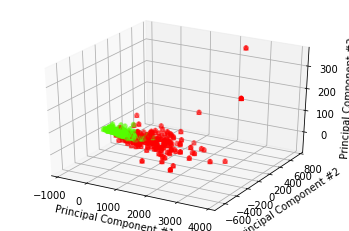



Figure2. DATA DIMENSION 3 WITH TruncatedSVD


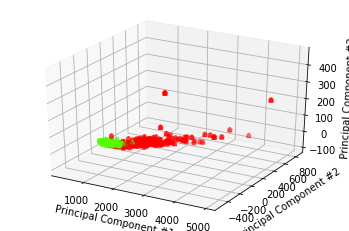



Figure3. DATA DIMENSION 3 WITH PCA AND STANDARDSCALER


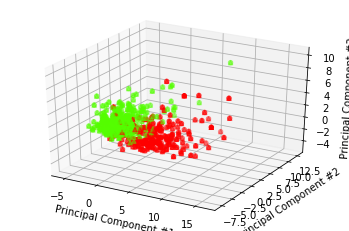



Figure4. DATA DIMENSION 3 WITH TruncatedSVD AND STANDARDSCALER


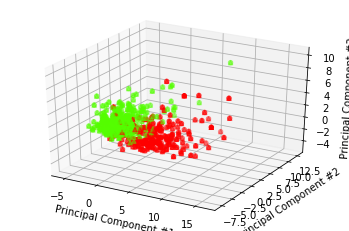



Figure5. DATA WITH THE BEST 3 FEATURES SELECTED WITH RFE


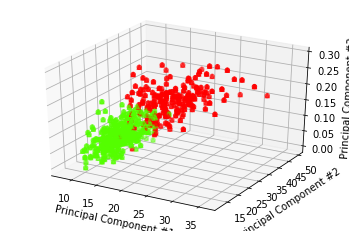



Figure6. DATA WITH THE BEST 3 FEATURES SELECTED WITH RFE AND USING STANDARDSCALER


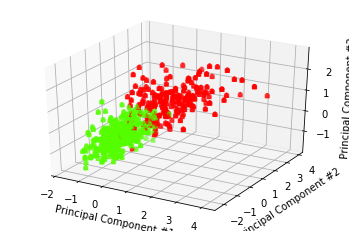

In [18]:
print('Figure1. DATA DIMENSION 3 WITH PCA')
plot3D_scatter(df_pca,y)
print('\n\nFigure2. DATA DIMENSION 3 WITH TruncatedSVD')
plot3D_scatter(df_svd,y)
print('\n\nFigure3. DATA DIMENSION 3 WITH PCA AND STANDARDSCALER')
plot3D_scatter(df_pca_scaled,y)
print('\n\nFigure4. DATA DIMENSION 3 WITH TruncatedSVD AND STANDARDSCALER')
plot3D_scatter(df_svd_scaled,y)
print('\n\nFigure5. DATA WITH THE BEST 3 FEATURES SELECTED WITH RFE')
plot3D_scatter(df_rfe,y)
print('\n\nFigure6. DATA WITH THE BEST 3 FEATURES SELECTED WITH RFE AND USING STANDARDSCALER')
plot3D_scatter(df_rfe_scaled,y)

** **

### Modeling

Using a MLPClassifier to compare all datasets

In [19]:
clf=MLPClassifier()
df_results=pd.DataFrame(columns=['data_processing','PCA', 'TruncatedSVD', 'RFE'])

**model_selection()** uses cros_val_score (with cv=10) for Model Validation 

Training models with: 
    - df_pca 
    - df_svd
    - df_rfe

In [20]:
df_results = df_results.append({'data_processing': 'None', 'PCA': model_selection(df_pca,y,clf) , 
                      'TruncatedSVD': model_selection(df_svd,y,clf) , 
                      'RFE': model_selection(df_rfe,y,clf) }, ignore_index=True)

Training models with: 
    - df_pca_scaled 
    - df_svd_scaled 
    - df_rfe_scaled 

In [21]:
df_results = df_results.append({'data_processing': 'StandardScaler', 'PCA': model_selection(df_pca_scaled,y,clf) , 
                      'TruncatedSVD': model_selection(df_svd_scaled,y,clf) , 
                      'RFE': model_selection(df_rfe_scaled,y,clf) }, ignore_index=True)

In [22]:
df_results=df_results.set_index('data_processing')

### Results

In [23]:
df_results

,PCA,TruncatedSVD,RFE
data_processing,,,
None,0.917622,0.917314,0.919317
StandardScaler,0.949054,0.954379,0.964937


### Conclusions

Like we can see above, generally the best results are using StandardScaler.

RFE has the best results for this example of dimensionality reduction.